# UTS (klasifikasi implementasi knn dan decision tree)

In [52]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics

In [53]:
data = pd.read_csv("https://raw.githubusercontent.com/rizkyluxszerr/datamining/main/dataR2.csv")

## 1. Metode KNN

In [39]:
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [40]:
data.shape

(116, 10)

In [41]:
# hapus kolom klasifikasi
X = data.drop(columns=["Classification"])
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [42]:
# melihat class kolom Classification
y = data["Classification"].values
y[0:116]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [43]:
# split dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [44]:
# fitur scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:5]

array([[ 0.75553343,  1.01236117, -0.20303566, -0.42079908, -0.35540058,
        -0.61223365,  0.14051154, -0.24167588, -0.72667284],
       [ 0.87932139,  0.0814711 ,  0.33820424,  0.83987903,  0.55186882,
         1.38298656, -1.22876835,  2.71674655, -0.76822742],
       [ 0.13659361,  0.23520358, -0.99029369, -0.64213348, -0.52505572,
        -0.51459168,  0.76927583,  1.33038621,  1.15504331],
       [-0.35855824, -1.85676975,  0.38740787, -0.36156596, -0.27161703,
        -0.8996454 ,  0.27187777, -0.9192353 , -0.01107372],
       [-0.23477028,  1.88348987,  0.19059336,  0.04763613, -0.01369955,
         0.01404307,  1.2543811 , -0.36212294,  0.52402557]])

In [45]:
from sklearn.neighbors import KNeighborsClassifier
# menentukan nilai k
knn = KNeighborsClassifier(n_neighbors = 5)
# klasifikasi data
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
# menampilkan hasil prediksi dari 5 model
knn.predict(X_test)[0:5]

array([2, 1, 2, 2, 2])

In [47]:
# cek nilai accuracy 
knn.score(X_test, y_test)

0.8620689655172413

## 2. Metode Decision Tree

In [60]:
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [61]:
# melihat klasifikasi dari data
data.Classification.value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [62]:
y = data["Classification"]
X = data.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

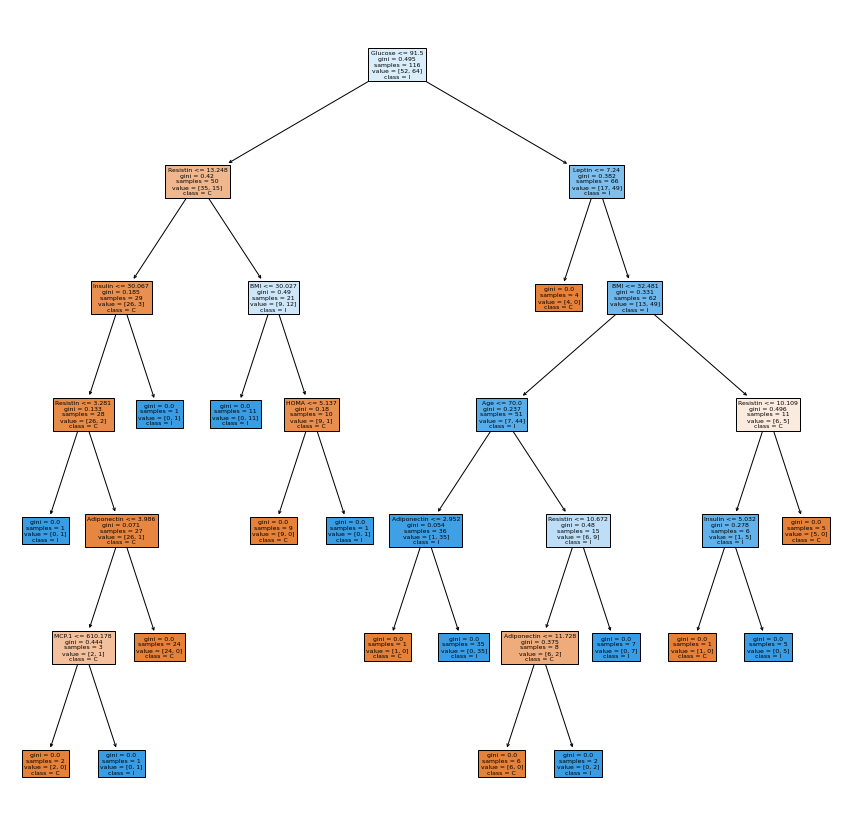

In [63]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf, feature_names=list(data.columns.values)[:9], class_names=list(data.columns.values)[9] ,filled=True)